# Converting images to input features

Lets explore how images are represented as inputs to a machine learning model. You probably know that each image is just a 2 dimensional matrix of pixels. Lets consider a black and white image. Each pixel is defined by a number between 0 to 255 which represents the darkness/brightness of pixel (0 is pure black, 255 is pure white). So for example, a 28x28 pixel black and white image is just a 28x28 matrix of numbers between 0 and 255. Lets see an example. We will use the [Fashion MNINST dataset](https://www.kaggle.com/zalando-research/fashionmnist) available on [Kaggle](https://www.kaggle.com/)

In [21]:
# import csv module of python for reading a csv file
import csv

# the data on that link is represented as a csv file in which each row is an image
# the images are black and white 28x28 pixel images of clothes
# each image row is 785 cells long
# the first cell in each row represents label (which type of clothing it is)
# the remaining 784 cells (28x28) represent pixels, each with value between 0 and 255

example_pixel_list = None

with open('../data/fashionmnist/fashion-mnist_train.csv', newline='') as f:
    reader = csv.reader(f)
    row_count = 0
    for row in reader:
        if row_count==0:
            # First row is a header (which contains column names), so we ignore it
            row_count = row_count + 1
            continue
        example_pixel_list = row # get the second row as first image
        print(row) # print the row
        break
f.close()

Lets check the dimension of this row

In [43]:
length_of_example_pixel_list = len(example_pixel_list)
print(length_of_example_pixel_list)

785


### Pop quiz - 

Why the row contains 785 elements when image is 28x28 pixels and 28x28 = 784?

Lets convert this single row into a 28x28 grid and plot the heatmap of values to visualize the image

In [39]:
# NumPy is a linear algebra library for python. Python by default has only lists and no vector/matrix operations
# Look at lists as grocery lists. They can contain any type of objects
# You cant add, multiply, or take dot product of grocery lists
# Numpy, using python lists and some extra code, gives a convinient way to represent vectors and operate on them

import numpy as np
example_pixel_map = np.zeros((28,28),dtype=np.float64) # initialize a 28x28 grid of 0s

Now insert each element of list into corresponding cell in the grid/matrix

In [40]:
# Make sure you understand how this was done
# Remember that the first element of the 785 element row is the label
# Then, if interested, find easier one line commands that can do the similar transformation

for row_number in range(1,29): # Why 29?
    for column_number in range(1,29):
        example_pixel_map[row_number - 1][column_number - 1] = example_pixel_list[28*(row_number - 1) + (column_number - 1) + 1]

Now lets draw the heatmap. You can see its a shirt!

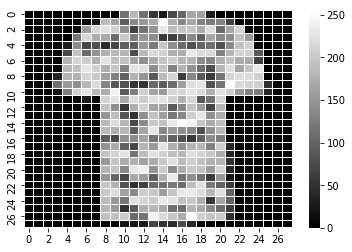

In [41]:
# Seaborn is one of the libraries used to make beautiful plots in python
# There are many other libraries

import seaborn as sns
sns.heatmap(example_pixel_map, cmap="gray", linewidths=.005)

### Pop quiz - 
What would be the dimension of a RGB color coded image represented as a matrix?